<a href="https://colab.research.google.com/github/AMIT110409/Imbalance-handling-extern/blob/main/Imbalance_Handling_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## Hyperparameter -

## hyper parameter is done by user requirement in the training phase 

## these are the parameter thar are explicity defines the user before the learning process begin . 

# Model PArameter:- These are the variable that are internal to the model
# and model learns theree on tis own . 

## the process of selecting the best hyperparameter is known as hyperperameter
# tunning and then tunning process is know as hyper perameter optimization .


## ML model are composed of two different types of parameter 

## Hyper PArameter :- ,Model parameter 

## Handling Imbalance data 

## method of handling dataset 

## under sampling, 





In [ ]:
## importing libaries 

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 


In [ ]:
df=pd.read_csv('original.csv')

In [ ]:
df.head()

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


In [ ]:
df.tail()

,clientid,income,age,loan,default
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0
1999,2000,69436.579552,56.152617,7378.833599,0


In [ ]:
df.shape

(2000, 5)

In [ ]:
df['default'].value_counts()

0    1717
1     283
Name: default, dtype: int64

In [ ]:
y=df['default']
x=df.drop(columns=['default','clientid'],axis=1)


In [ ]:
x

,income,age,loan
0,66155.925095,59.017015,8106.532131
1,34415.153966,48.117153,6564.745018
2,57317.170063,63.108049,8020.953296
3,42709.534201,45.751972,6103.642260
4,66952.688845,18.584336,8770.099235
...,...,...,...
1995,59221.044874,48.518179,1926.729397
1996,69516.127573,23.162104,3503.176156
1997,44311.449262,28.017167,5522.786693
1998,43756.056605,63.971796,1622.722598


In [ ]:
y

0       0
1       0
2       0
3       0
4       1
       ..
1995    0
1996    0
1997    1
1998    0
1999    0
Name: default, Length: 2000, dtype: int64

In [ ]:
x.isnull().sum()

income    0
age       3
loan      0
dtype: int64

In [ ]:
x['age'].fillna(x['age'].mean(),inplace=True)

In [ ]:
x.isnull().sum()

income    0
age       0
loan      0
dtype: int64

In [ ]:
## Undersampling

from sklearn.tree import DecisionTreeClassifier


In [ ]:
Dtree=DecisionTreeClassifier()


In [ ]:
Dtree.fit(x,y)

DecisionTreeClassifier()

In [ ]:
y.value_counts()

0    1717
1     283
Name: default, dtype: int64

Text(0, 0.5, 'frequency')

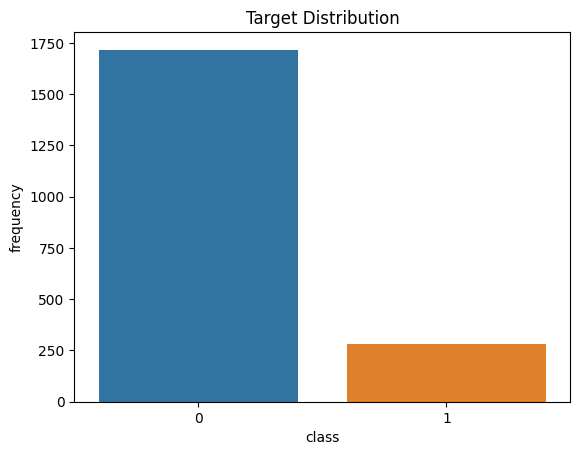

In [ ]:
sns.countplot(x=y,data=df)
plt.title('Target Distribution')
plt.xlabel('class')
plt.ylabel('frequency')

In [ ]:
from imblearn.under_sampling import RandomUnderSampler


In [ ]:
us=RandomUnderSampler(random_state=0)


In [ ]:
x_res,y_res=us.fit_resample(x,y)


In [ ]:
x_res

,income,age,loan
0,66078.769350,45.536325,3664.621452
1,40654.892537,55.496853,4755.825280
2,65000.819617,21.699700,1114.914824
3,37895.181733,54.515149,6071.340205
4,53033.864130,38.457560,10427.470503
...,...,...,...
561,22800.796775,28.198257,3740.900936
562,21982.017374,34.915516,4265.173704
563,64466.760138,33.327144,8537.369666
564,43662.092688,25.252609,7269.596897


In [ ]:
y_res.value_counts()

0    283
1    283
Name: default, dtype: int64

In [ ]:
## Oversampling 

from imblearn.over_sampling import RandomOverSampler 


In [ ]:
os=RandomOverSampler(random_state=0)


In [ ]:
x_res2,y_res2 = os.fit_resample(x,y)

In [ ]:
y_res2.value_counts()

0    1717
1    1717
Name: default, dtype: int64

Text(0, 0.5, 'frequency')

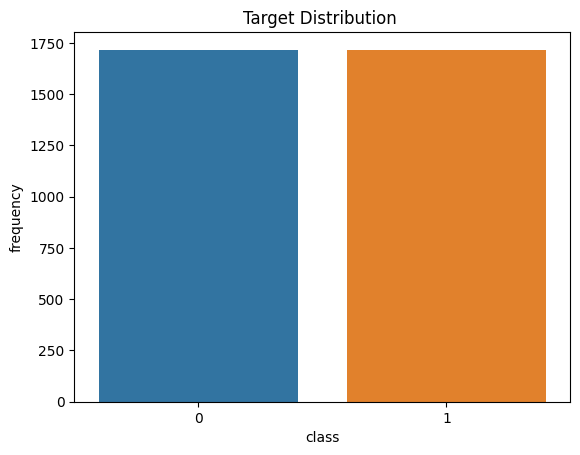

In [ ]:
sns.countplot(x=y_res2,data=df)
plt.title('Target Distribution ')
plt.xlabel('class')
plt.ylabel('frequency')


In [ ]:
p=Dtree.predict(x_res2)

In [ ]:
from sklearn.metrics import classification_report 


In [ ]:
print(classification_report(p,y_res2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1717
           1       1.00      1.00      1.00      1717

    accuracy                           1.00      3434
   macro avg       1.00      1.00      1.00      3434
weighted avg       1.00      1.00      1.00      3434



In [ ]:
## SMOTE 

df=pd.read_csv('original.csv')

In [ ]:
df.head()

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


In [ ]:
y=df['default']
x=df.drop(columns=['default','clientid'],axis=1)


In [ ]:
x['age'].fillna(x['age'].mean(),inplace=True)


In [ ]:
x.shape

(2000, 3)

In [ ]:
y.value_counts()

0    1717
1     283
Name: default, dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
smote=SMOTE()


In [ ]:
x_res3,y_res3=smote.fit_resample(x,y)


In [ ]:
print(y.value_counts())
print(y_res3.value_counts())

0    1717
1     283
Name: default, dtype: int64
0    1717
1    1717
Name: default, dtype: int64


In [ ]:
p=Dtree.predict(x_res3)

In [ ]:
print(classification_report(p,y_res3))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1727
           1       0.99      1.00      1.00      1707

    accuracy                           1.00      3434
   macro avg       1.00      1.00      1.00      3434
weighted avg       1.00      1.00      1.00      3434

